In [141]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew
%matplotlib inline

In [142]:
train = pd.read_csv("train.csv")
train.drop('Id', axis = 1, inplace = True)
train = train[train.SalePrice <= 520000] # exclude some outliners
train["SalePrice"] = np.log1p(train["SalePrice"]) ## np.log1p(x) = log(x+1)
y = train.SalePrice.values
test = pd.read_csv("test.csv").drop("Id", axis = 1)
train.head(3)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,12.247699
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,12.109016
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,12.317171


In [143]:
all_data = pd.concat([train.loc[:, 'MSSubClass':'SaleCondition'],
                     test.loc[:, 'MSSubClass':'SaleCondition']], ignore_index=True)

all_data.drop(labels = ['PoolQC', 'Utilities', 'GarageYrBlt'], axis = 1, inplace = True)

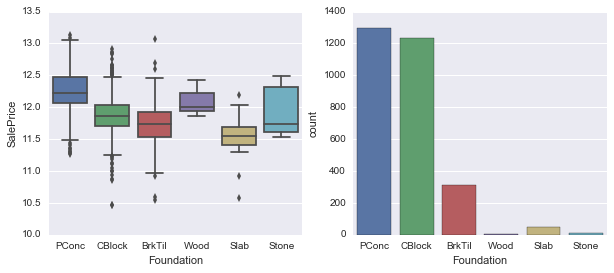

In [144]:
# fig, ax = plt.subplots(1, 2, figsize = (10, 4))
# sns.boxplot('Foundation', 'SalePrice', data = train, ax = ax[0])
# sns.countplot('Foundation', data = all_data, ax = ax[1])

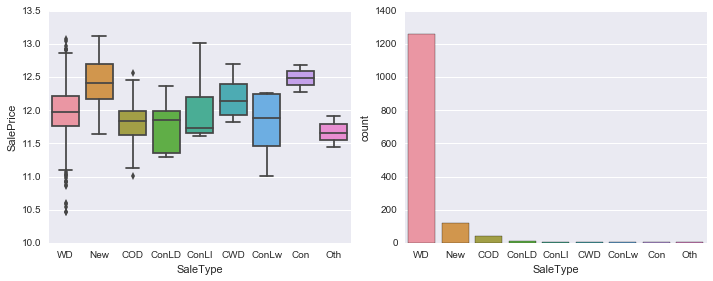

In [145]:
#sns.countplot('MSZoning', data = all_data)

# fig, ax = plt.subplots(1, 2, figsize = (10, 4))
# sns.boxplot('SaleType', 'SalePrice', data = train, ax = ax[0])
# sns.countplot('SaleType', data = train, ax = ax[1])
# plt.tight_layout()
#all_data.loc[:, 'MSSubClass'] = all_data['MSSubClass'].apply(str)
# all_data.replace({20: 20,
#                   30: 30,
#                   40: 20,
#                   45: 30,
#                   50: 20,
#                   60: 60,
#                   70: 20,
#                   75: 20,
#                   80: 20,
#                   85: 20,
#                   90: 90,
#                   120: 120,
#                   150: 20,
#                   160: 20,
#                   180: 30,
#                   190: 20
#                  }, inplace = True)

## Missing Value

In [146]:
all_data.Alley.fillna('NoAlley', inplace = True)
all_data.MiscFeature.fillna('No', inplace = True)
all_data.loc[all_data.MiscFeature == 'TenC', 'MiscFeature'] = 'No'
all_data.Fence.fillna('NoFence', inplace = True)
all_data.FireplaceQu.fillna('No', inplace = True)
all_data.loc[all_data.GarageCars.isnull(), 'GarageCars'] = 2
all_data.loc[all_data.GarageArea.isnull(), 'GarageArea'] = all_data[all_data.GarageCars == 2].GarageArea.median()
all_data.loc[all_data.GarageType.isnull(), 'GarageType'] = 'NoGarage'
all_data.loc[all_data.GarageFinish.isnull(), 'GarageFinish'] = 'NoGarage'
all_data.loc[all_data.GarageQual.isnull(), 'GarageQual'] = 'NoGarage'
all_data.loc[all_data.GarageCond.isnull(), 'GarageCond'] = 'NoGarage'
all_data.loc[all_data.SaleType.isnull(), 'SaleType'] = 'WD'
all_data.loc[all_data.BsmtQual.isnull(), 'BsmtQual'] = 'NoBsmt'
all_data.loc[all_data.BsmtCond.isnull(), 'BsmtCond'] = 'NoBsmt'
all_data.loc[all_data.BsmtExposure.isnull(), 'BsmtExposure'] = 'NoBsmt'
all_data.loc[all_data.BsmtFinType1.isnull(), 'BsmtFinType1'] = 'NoBsmt'
all_data.loc[all_data.BsmtFinSF1.isnull(), 'BsmtFinSF1'] = 0
all_data.loc[all_data.BsmtUnfSF.isnull(), 'BsmtUnfSF'] = 0
all_data.loc[all_data.BsmtFinType2.isnull(), 'BsmtFinType2'] = 'NoBsmt'
all_data.loc[all_data.BsmtFinSF2.isnull(), 'BsmtFinSF2'] = 0
all_data.loc[all_data.TotalBsmtSF.isnull(), 'TotalBsmtSF'] = 0
all_data.loc[all_data.BsmtFullBath.isnull(), 'BsmtFullBath'] = 0
all_data.loc[all_data.BsmtHalfBath.isnull(), 'BsmtHalfBath'] = 0
all_data.loc[all_data.Electrical.isnull(), 'Electrical'] = 'SBrkr'
all_data.loc[all_data.KitchenQual.isnull(), 'KitchenQual'] = 'TA'
all_data.loc[all_data.MasVnrArea.isnull(), 'MasVnrType'] = 'None'
all_data.loc[all_data.MasVnrArea.isnull(), 'MasVnrArea'] = 0
all_data.loc[2610, 'MasVnrType'] = 'BrkFace'
all_data.loc[all_data.Exterior1st.isnull(), 'Exterior1st'] = 'VinylSd'
all_data.loc[all_data.Exterior2nd.isnull(), 'Exterior2nd'] = 'VinylSd'
all_data.loc[all_data.MSZoning.isnull(), 'MSZoning'] = all_data.loc[all_data.MSZoning.isnull(), 'YearBuilt'].apply(
    lambda x: 'RM' if x <= 1910 else 'RL')
all_data.loc[all_data.Functional.isnull(), 'Functional'] = 'Typ'
# all_data.loc[all_data.GarageYrBlt == 2207, 'GarageYrBlt'] = 2007

## Log Transformed Skewed Features

In [147]:
# log transform skewed numeric features:
temporal_feats = all_data.filter(regex = 'Yr|Year|Mo').columns.values
numeric_feats = all_data.select_dtypes(exclude = ['object']).columns.values
numeric_feats = np.setdiff1d(numeric_feats, temporal_feats)
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna()))
skewed_feats = skewed_feats[abs(skewed_feats) > 0.5].index
all_data[skewed_feats] = np.log1p(all_data[skewed_feats])
print skewed_feats.values

['1stFlrSF' '2ndFlrSF' '3SsnPorch' 'BsmtFinSF1' 'BsmtFinSF2' 'BsmtFullBath'
 'BsmtHalfBath' 'BsmtUnfSF' 'EnclosedPorch' 'Fireplaces' 'GrLivArea'
 'HalfBath' 'KitchenAbvGr' 'LotArea' 'LotFrontage' 'LowQualFinSF'
 'MSSubClass' 'MasVnrArea' 'MiscVal' 'OpenPorchSF' 'OverallCond' 'PoolArea'
 'ScreenPorch' 'TotRmsAbvGrd' 'TotalBsmtSF' 'WoodDeckSF']


## PCA on Strongly Correlated Features

In [148]:
from sklearn.linear_model import LinearRegression, RANSACRegressor
from sklearn.decomposition import PCA

lr = RANSACRegressor(LinearRegression())
lot_train = all_data.loc[all_data.LotFrontage.notnull(), ['LotFrontage', 'LotArea']]
#print lot_train.LotArea.count(), lot_train.LotFrontage.count()
X = lot_train.LotArea.values
X = X[:, np.newaxis]
lot_test = all_data.loc[all_data.LotFrontage.isnull()].LotArea
lot_area_test = lot_test.values[:, np.newaxis]
y_lot = lot_train.LotFrontage.values
lr.fit(X, y_lot)
all_data.loc[all_data.LotFrontage.isnull(), 'LotFrontage'] = lr.predict(lot_area_test)

pca = PCA(n_components=2)
pca_lot = pca.fit_transform(all_data.loc[:, ['LotFrontage', 'LotArea']])
all_data['Lot0'] = pca_lot[:, 0]
#all_data['Lot1'] = pca_lot[:, 1]
all_data.drop(labels=['LotArea', 'LotFrontage'], axis = 1, inplace = True)

In [149]:
all_data['Age'] = all_data['YrSold'] - all_data['YearBuilt']
all_data['AgeRemod'] = all_data['YrSold'] - all_data['YearRemodAdd']
all_data['BsmtBath'] = all_data['BsmtFullBath'] + 0.5*all_data['BsmtHalfBath']
all_data['TotalBath'] = all_data['FullBath'] + 0.5*all_data['HalfBath']
all_data.drop(labels=['BsmtHalfBath', 'BsmtFullBath', 'FullBath', 'HalfBath'],
              axis = 1, inplace = True)

## Transform Ordinal Features

### combined some unless levels in cat features to avoid overfitting

In [150]:
all_data.loc[all_data.MSZoning == 'RL', 'MSZoning'] = 'RH'
all_data.loc[all_data.MSZoning == 'C (all)', 'MSZoning'] = 'C'
all_data.loc[all_data.Neighborhood.isin(['Blmngtn', 'Blueste', 'BrDale', 'CollgCr','IDOTRR', 'NAmes', 'NPkVill', 
                                         'SWISU', 'Sawyer', 'SawyerW', 'Timber', 'Veenker']), 'Neighborhood'] = 'Others'

all_data.loc[all_data.Exterior1st.isin(['AsbShng', 'AsphShn', 'BrkComm', 'CBlock', 'CemntBd', 'ImStucc', 'Plywood', 
                                        'Stone', 'Stucco', 'WdShing']), 'Exterior1st'] = 'Unrel'
all_data.loc[all_data.Condition1.isin(['Feedr', 'PosA', 'PosN', 'RRNe', 'RRNn']), 'Condition1'] = 'Unrel'
all_data.loc[all_data.Condition2.isin(['Artery', 'Feedr', 'Norm', 'PosA', 
                                       'RRAe', 'RRAn', 'RRNn']), 'Condition2'] = 'Unrel'

all_data.loc[all_data.RoofMatl.isin(['CompShg', 'Membran', 'Metal', 'WdShake']), 'RoofMatl'] = 'Unrel'
all_data.loc[all_data.RoofMatl.isin(['Roll', 'Tar&Grv']), 'RoofMatl'] = 'Roll'
all_data.loc[all_data.SaleType.isin(['ConLI', 'ConLw', 'ConLD', 'Con', 'CWD']), 'SaleType'] = 'Con'
all_data.loc[all_data.HeatingQC.isin(['Fa', 'Po']), 'HeatingQC'] = 'TA'
#all_data["LandContour"] = all_data.LandContour.apply(lambda x: 1 if x == "Bnk" else 0)
# all_data['LotConfig'] = all_data.LotConfig.apply(lambda x: 1 if x in ['Inside', 'FR2', 'Corner'] else 0)
all_data.loc[all_data.LotConfig.isin(['FR2']), 'LotConfig'] = 'Inside'
all_data.loc[all_data.LotConfig.isin(['FR3']), 'LotConfig'] = 'CulDSac'
all_data.loc[all_data.Foundation == 'Wood', 'Foundation'] = 'PConc'

## Create New Features

In [151]:
# all_data['OverallQual_sq'] = all_data['OverallQual']**2
# all_data['OverallQual_cb'] = all_data['OverallQual']**3
# all_data['GrLivArea_sq'] = all_data['GrLivArea']**2
# all_data['GrLivArea_cb'] = all_data['GrLivArea']**3
all_data['Overall_Qual_plus_GrLA'] = all_data['OverallQual'] + all_data['GrLivArea']


#all_data['OverallQual_Square']=all_data['OverallQual']*all_data['OverallQual']
all_data['OverallQual_3']=all_data['OverallQual']*all_data['OverallQual']*all_data['OverallQual']
all_data['OverallQual_exp']=np.exp(all_data['OverallQual'])
#all_data['GrLivArea_Square']=all_data['GrLivArea']*all_data['GrLivArea']
all_data['GrLivArea_3']=all_data['GrLivArea']*all_data['GrLivArea']*all_data['GrLivArea']
all_data['GrLivArea_exp']=np.exp(all_data['GrLivArea'])
#all_data['GrLivArea_log']=np.log(all_data['GrLivArea'])
#all_data['TotalBsmtSF_/GrLivArea']=all_data['TotalBsmtSF']/all_data['GrLivArea']
all_data['OverallCond_sqrt']=np.sqrt(all_data['OverallCond'])
all_data['OverallCond_square']=all_data['OverallCond']*all_data['OverallCond']
#all_data['LotArea_sqrt']=np.sqrt(all_data['LotArea'])
all_data['1stFlrSF_sqrt']=np.sqrt(all_data['1stFlrSF'])
#del all_data['1stFlrSF']
all_data['TotRmsAbvGrd_sqrt']=np.sqrt(all_data['TotRmsAbvGrd'])

In [152]:
all_data['HouseStyle'] = all_data.HouseStyle.apply(lambda x: 1 if x == '2Story' else 0)
all_data['Condition1'] = all_data.Condition1.apply(lambda x: 1 if x == 'Norm' else 0)

In [153]:
all_data['season'] = all_data.MoSold.replace( {1: 0, 
                                   2: 0, 
                                   3: 0, 
                                   4: 1,
                                   5: 1, 
                                   6: 1,
                                   7: 1,
                                   8: 0,
                                   9: 0,
                                  10: 0,
                                  11: 0,
                                  12: 0})

## Drop Features

In [154]:
useless_feat = ['MiscFeature', 'Exterior2nd', 'Street', 'OverallCond', 'YearRemodAdd', 'GrLivArea_exp', 'GrLivArea_3',
                'MasVnrArea', 'PoolArea', 'YrSold', 'TotRmsAbvGrd', 'OverallCond_sqrt', 'GarageCond', 'BsmtCond',
                'TotRmsAbvGrd_sqrt', '1stFlrSF', '2ndFlrSF', 'Alley', 'ExterCond', 'Heating', 'FireplaceQu',
                'LandSlope', 'MoSold', 'YearBuilt', 'OverallQual', 'RoofStyle', 'Electrical', 'Fence'
               ]
all_data.drop(labels=useless_feat, axis = 1, inplace = True)

In [155]:
cat_features = all_data.select_dtypes(include = ['object']).columns.values

## Lasso Model

In [156]:
from sklearn.linear_model import ElasticNet, LassoCV
from sklearn.cross_validation import cross_val_score, KFold
from sklearn.preprocessing import RobustScaler

In [157]:
def rmse_cv(model, X, y):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring = "mean_squared_error", cv = 10)).mean()
    return (rmse)

In [158]:
all_data = pd.get_dummies(all_data)
scale_data = RobustScaler().fit_transform(all_data)
X_train = scale_data[:train.shape[0], ]
X_test = scale_data[train.shape[0]:, ]

In [159]:
alphas = [0.0001, 0.0005, 0.001, 0.003, 0.01, 0.03, 0.1, 1]

In [160]:
model_lasso = LassoCV(alphas=alphas, n_jobs = -1, max_iter = 5000, cv = 10, random_state=18).fit(X_train, y)

In [161]:
rmse_cv(model_lasso, X_train, y)

0.11885570621715909

In [162]:
cf = pd.DataFrame({'features': all_data.columns.values, 'coef': model_lasso.coef_})

In [163]:
dropped_features = cf[cf.coef == 0].features.values

In [164]:
#print '","'.join(dropped_features)
dropped_features

array(['LotShape_IR3', 'LotShape_Reg', 'LandContour_HLS',
       'LandContour_Low', 'LandContour_Lvl', 'LotConfig_Corner',
       'BldgType_2fmCon', 'BldgType_Twnhs', 'RoofMatl_Roll',
       'RoofMatl_Unrel', 'MasVnrType_BrkFace', 'MasVnrType_None',
       'MasVnrType_Stone', 'ExterQual_Ex', 'ExterQual_Fa', 'ExterQual_Gd',
       'Foundation_CBlock', 'Foundation_Slab', 'Foundation_Stone',
       'BsmtQual_Fa', 'BsmtQual_Gd', 'BsmtQual_NoBsmt', 'BsmtExposure_Av',
       'BsmtExposure_Mn', 'BsmtExposure_NoBsmt', 'BsmtFinType1_BLQ',
       'BsmtFinType1_NoBsmt', 'BsmtFinType1_Unf', 'BsmtFinType2_ALQ',
       'BsmtFinType2_GLQ', 'BsmtFinType2_LwQ', 'BsmtFinType2_NoBsmt',
       'BsmtFinType2_Rec', 'BsmtFinType2_Unf', 'HeatingQC_Gd',
       'CentralAir_Y', 'KitchenQual_Fa', 'KitchenQual_Gd',
       'Functional_Maj1', 'Functional_Min1', 'Functional_Min2',
       'Functional_Mod', 'Functional_Sev', 'GarageType_2Types',
       'GarageType_Basment', 'GarageType_BuiltIn', 'GarageType_CarPort',
 

In [165]:
l = [x.split('_')[1] for x in dropped_features if x.startswith('HeatingQC')]
print l

['Gd']


In [166]:
len(l)

1

In [167]:
#all_data.OverallQual

In [168]:
cf[cf.features.str.contains('Foundation')]

,coef,features
85,-0.018438,Foundation_BrkTil
86,-0.000000,Foundation_CBlock
87,0.011551,Foundation_PConc
88,0.000000,Foundation_Slab
89,0.000000,Foundation_Stone


## Prediction

In [169]:
def predict(model, test_data, filename):
    ypred = model.predict(test_data)
    submission = pd.read_csv("sample_submission.csv")
    submission['SalePrice'] = np.expm1(ypred)
    submission.to_csv(filename, index = False)

In [170]:
predict(model_lasso, X_test, 'lasso_new_feature.csv')